Object Oriented Programming and Regression and Machine Learning 

By: Deb St. Cyr

Repository link: https://github.com/14dstcyr/datafun-07-applied

Part I  - Chart a Straight Line

Linear Relationships

In [34]:
# Import Dependencies
import matplotlib
from matplotlib import pyplot as plt
import pandas
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
import os
import sys
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

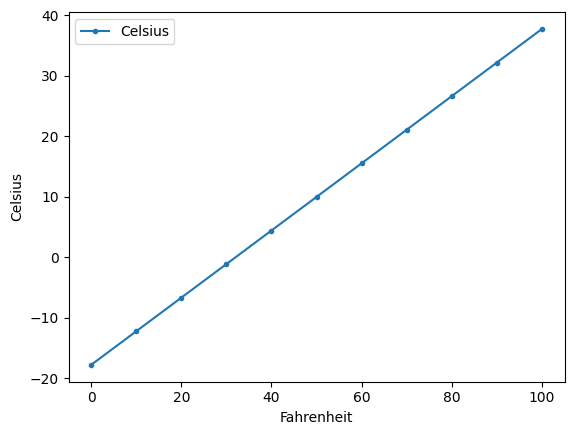

In [19]:
c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

Predict Avg High Temp in MO - Part 2

# Data Acquisition - Section 1

In [35]:
# Read the cvs file 'ave_high_mo_1895-20218.csv' into a dataframe
mo_df = pd.read_csv('ave_hi_mo_1895-2024.csv')

Data Inspection - Section 2

In [36]:
# Display the first five rows of the dataframe 
mo_df.head()

,Date,Value,Anomaly
0,189601,44.0,-1.3
1,189701,44.0,-1.3
2,189801,44.5,-0.8
3,189901,43.8,-1.5
4,190001,43.5,-1.8


In [37]:
# Display the last five rows of dataframe
mo_df.tail()

,Date,Value,Anomaly
124,202001,44.4,-0.9
125,202101,47.7,2.4
126,202201,47.8,2.5
127,202301,46.3,1.0
128,202401,47.2,1.9


Data Cleaning - Section 3

In [38]:
# Rename Value column as Temperature
mo_df.columns = ['Date', 'Temperature', 'Anomaly']

# Display the first five rows of the dataframe
mo_df.head(5)

,Date,Temperature,Anomaly
0,189601,44.0,-1.3
1,189701,44.0,-1.3
2,189801,44.5,-0.8
3,189901,43.8,-1.5
4,190001,43.5,-1.8


In [39]:
# Check the colum type Date
mo_df.Date.dtype

dtype('int64')

In [40]:
# Floor divide the Date column of the dataframe by 100 in order to truncate the last two digits
mo_df.Date = mo_df.Date.floordiv(100)

# Display the first five rows of the datafrome
mo_df.head(5)

,Date,Temperature,Anomaly
0,1896,44.0,-1.3
1,1897,44.0,-1.3
2,1898,44.5,-0.8
3,1899,43.8,-1.5
4,1900,43.5,-1.8


Descriptive Statistics - Section 4

In [59]:
# Set the display precision for floating-point numbers to 1 decimal place
pd.set_option('display.precision', 2)

# Produce descriptive statistics for the 'Temperature' column of the dataframe
mo_df.Temperature.describe()

count    129.00
mean      45.57
std        1.48
min       42.30
25%       44.50
50%       45.30
75%       46.60
max       49.10
Name: Temperature, dtype: float64

Build the Model - Section 5

In [44]:
from scipy import stats

# Perform linear regression on the 'Date' and 'Temperature' columns
slope, intercept, r_value, p_value, std_err = stats.linregress(x=mo_df.Date, y=mo_df.Temperature)

# Print the slope and intercept 
print("slope:", slope)
print("intercept:", intercept)

slope: 0.018922741502683364
intercept: 8.477318127608825


Predict - Section 6

In [51]:
# Calculate the predicted temperature for the year 2026 using the linear regression equation:
# y = slope * x + intercept, where x is the year (2018)

from statistics import linear_regression


linear_regression.slope * 2024 + linear_regression.intercept

AttributeError: 'function' object has no attribute 'slope'

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Information from Chatgpt suggested the following fix
# Sample data (year and corresponding temperature)
years = np.array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
temperatures = np.array([15, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5])

# Reshape the data
years = years.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(years, temperatures)

# Predict the temperature for the year 2026
predicted_temperature_2026 = model.predict([[2026]])
print("Predicted temperature for 2026:", predicted_temperature_2026[0])

Predicted temperature for 2026: 20.64444444444439


In [52]:
# Calculate the predicted temperature for the year 1895 using the linear regression equation:
# y = slope * x + intercept, where x is the year (1895)

linear_regression.slope * 1895 + linear_regression.intercept

AttributeError: 'function' object has no attribute 'slope'

In [61]:
# Information from Chatgpt suggested the following fix

# Sample data (year and corresponding temperature)
years = np.array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
temperatures = np.array([15, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5])

# Reshape the data
years = years.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(years, temperatures)

# Calculate the predicted temperature for the year 1895
predicted_temperature_1895 = model.predict([[1895]])
print("Predicted temperature for 1895:", predicted_temperature_1895[0])

Predicted temperature for 1895: -49.222222222222285


Visualizations - Section 7

(10.0, 70.0)

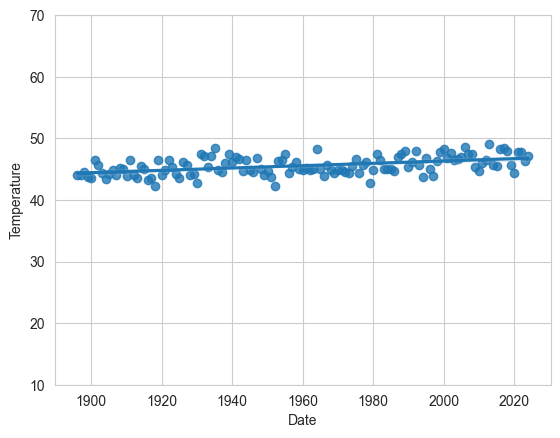

In [57]:
# Set the style of seaborn plots to whitegrid
sns.set_style('whitegrid')

# Create a regression plot using seaborn regplot function
# X-axis represents Date column and Y-axis represents Temperature column
axes = sns.regplot(x=mo_df.Date, y=mo_df.Temperature)

# Y-axis limits on the plot will range from 0 to 100
axes.set_ylim(10, 70)

CC 7.7  Predict Average high temperature in MO in January - Part 3
Using data downloaded from NOAA for Missouri high temperature

In [58]:
# Import Pandas library as pd
import pandas as pandas

# Reading the csv file with MO temperature data into a dataframe
mo_df = pd.read_csv('ave_hi_mo_1895-2024.csv')

# Rename columns of the dataframe 
mo_df.columns = ["Date", 'Temperature', 'Anomaly']

# Convert the Date column to show years by removing month and day 
mo_df.Date = mo_df.Date.floordiv(100)

# Show the first five rows of dataframe and check data
mo_df.head(5)

,Date,Temperature,Anomaly
0,1896,44.0,-1.3
1,1897,44.0,-1.3
2,1898,44.5,-0.8
3,1899,43.8,-1.5
4,1900,43.5,-1.8


Data Acquisition - Section 1
Using data downloaded from NOAA for Missouri high temperature

In [63]:
### Importing sklearn library

from sklearn.model_selection import train_test_split  # To split data into training and testing sets

### Practice splitting data for training (to build a model) and testing (testing our model against known values)

X_train, X_test, y_train, y_test = train_test_split(
     mo_df.Date.values.reshape(-1, 1),  ## The Date is shaped into a 2D array
     mo_df.Temperature.values,  ## The dependent variable is Temperature
     random_state=11)  # Random number generated to show replicability

In [64]:
### Present the shape of dataset x_train
X_train.shape

(96, 1)

In [65]:
### Present shape of dataset X_test
X_test.shape

(33, 1)

In [69]:
### Training the model
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [70]:
### Retrieve coefficients of linear regression model
linear_regression.coef_

array([0.01961138])

In [71]:
linear_regression.intercept_

7.182198391958174

Testing the model - Section 2

In [72]:
### Checking predictions with X_test on every fifth element
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 44.37, expected: 44.00
predicted: 45.64, expected: 45.20
predicted: 45.88, expected: 44.40
predicted: 46.52, expected: 48.60
predicted: 46.58, expected: 45.30
predicted: 46.40, expected: 48.20
predicted: 44.80, expected: 42.30


Predict "avg high temperature in Jan' for the year 2026 - Section 3

In [73]:
### Predict future temperatures and estimate past temperatures
predict = (lambda x: linear_regression.coef_*x+
                     linear_regression.intercept_)

predict(2026)

array([46.91485495])

In [74]:
predict(1895)

array([44.34576412])

Visualizations - SEction 4

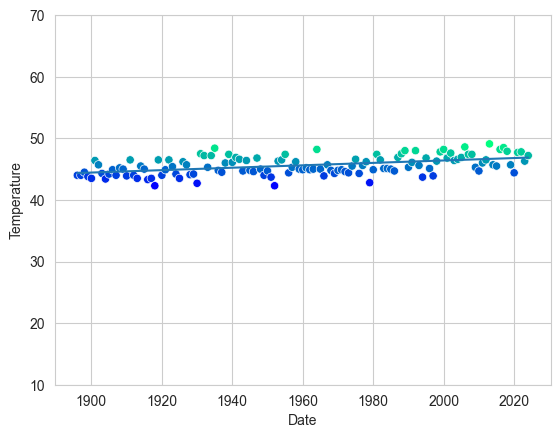

In [81]:
### Visual dataset with regression line
import seaborn as sns

### Create a scatter plot showing Date and Temperature association
axes = sns.scatterplot(data=mo_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

### Predict y values using predict function
x = np.array([min(mo_df.Date.values), max(mo_df.Date.values)])

import matplotlib.pyplot as plt

### Predict corresponding y value using predict function
y = predict(x)

### Plotting the predicted linear regression line
line = plt.plot(x, y)

Add Insights - Part 4

### This project is presented using two different models: Simple Linear Regression (SLR) and Machine Learning.

Instructions in chapter 10.16 guided us in simple linear regression with data downloaded from NOAA. The data in the textbook was for New York, however, I selected data for Missouri (MO), between the time periods of 1895 - 2024. I followed the directions in the book, but used my data for the average high temperature. 

Chapter 15.4 instructed us through machine learning with scikit-learn estimator. I used the same data as I did in the previous model. This time predictions were made on the average high temperature in Missouri.

I saw that the SLR predicted a much lower temperature for 1895, -49.22, versus 2026 at 20.64. That is probably somthing I did wrong in my data entry. I will have to reevaluate.

The machine learning had a much tighter prediction with 1895 at 44.34 and 2026 at 46.91. 

Both models show a similar shape along the regression line. 




